In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv(r'data\airbnb_anuncios.csv')

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### cambio de tipos

In [7]:
# lo primero que podemos comprobar es el tipo de dato de cada columna
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
#cambiamos precio de int a float 
df['price'] = df['price'].astype(float)

In [9]:
#cambiamos lastreview de object a datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [10]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70.0,1,65,2019-09-04,0.56,1,53
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17.0,4,33,2018-07-15,0.55,2,48


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

### comprobacion duplicados

In [12]:
df.duplicated().sum() #comprueba si hay duplicados

np.int64(0)

In [13]:
df_dup = df[['name', 'price', 'latitude', 'longitude']]

In [14]:
df_dup.duplicated().sum() #comprueba si hay duplicados en las columnas seleccionadas

np.int64(0)

### comprobacion nulos

In [15]:
df.isnull().sum() #comprueba si hay valores nulos

id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [16]:
df.isnull().sum() / len(df) * 100 #porcentaje de valores nulos por columna

id                                 0.000000
name                               0.023996
host_id                            0.000000
host_name                          0.071987
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       22.335269
reviews_per_month                 22.335269
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [17]:
df['reviews_per_month'].max() #valor mínimo de la columna reviews_per_month

np.float64(34.23)

<Axes: >

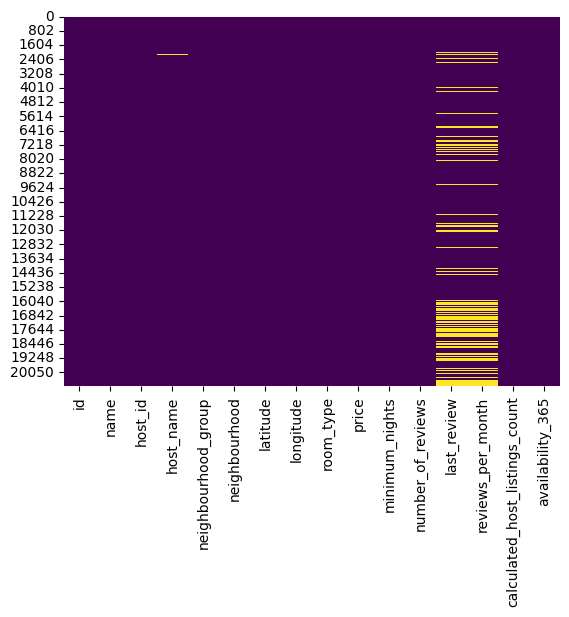

In [18]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #visualiza los valores nulos

In [19]:
# para arreglar nulos, en el caso de name que no tiene descripción, podemos rellenar con un string que diga 'sin descripción'
df['name'] = df['name'].fillna('sin descripción')

In [20]:
# para arreglar el host_name podemos fijarnos en el host_id y rellenar con el nombre del host que tenga ese id
df['host_name'] = df['host_name'].fillna(df.groupby('host_id')['host_name'].transform('first'))

In [21]:
# al no corresponder a ninguno, cambiamos el valor nulo a sin datos
df['host_name'] = df['host_name'].fillna('sin datos')

In [22]:
#creamos copia de df para no modificar el original
df_3 = df.copy()

In [23]:
df_3 = df_3[['number_of_reviews', 'last_review', 'reviews_per_month','id']]

In [24]:
#filtrar df por los nulos de last_review
df_3 = df_3[df_3['last_review'].isnull()]
df_3 

,number_of_reviews,last_review,reviews_per_month,id
28,0,NaT,NaN,102040
59,0,NaT,NaN,183435
64,0,NaT,NaN,200828
79,0,NaT,NaN,231861
194,0,NaT,NaN,500742
...,...,...,...,...
20832,0,NaT,NaN,38725567
20833,0,NaT,NaN,38726351
20834,0,NaT,NaN,38727654
20835,0,NaT,NaN,38728727


In [25]:
# si la columna number_of_reviews contiene 0 , rellenamos last_review con 00-00-00
df_3.loc[df_3['number_of_reviews'] == 0, 'last_review'] = '0000-00-00' 

C:\Users\cmoli\AppData\Local\Temp\ipykernel_15232\819649163.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0000-00-00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_3.loc[df_3['number_of_reviews'] == 0, 'last_review'] = '0000-00-00'
